# Problem: Ev Fiyatları ve Özellikler Arasındaki Korelasyon

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
house = pd.read_csv("housing.csv")
df = house.copy()
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [5]:
df.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [9]:
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [10]:
df.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [11]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


# Pearson's Correlation

In [14]:
from scipy.stats import pearsonr

In [19]:
for col in df.columns:
    if col != "Price":
        stat, p = pearsonr(df[col], df["Price"])
        print(f"{col} için stat = {stat:.3f}   p = {p:.3f}")
    
        if p > 0.05:
            print("Probably independent")
        else:
            print("Probably dependent")
        print("*" * 50)

Bedroom için stat = 0.302   p = 0.000
Probably dependent
**************************************************
Space için stat = 0.709   p = 0.000
Probably dependent
**************************************************
Room için stat = 0.578   p = 0.000
Probably dependent
**************************************************
Lot için stat = 0.435   p = 0.000
Probably dependent
**************************************************
Tax için stat = 0.494   p = 0.000
Probably dependent
**************************************************
Bathroom için stat = 0.538   p = 0.000
Probably dependent
**************************************************
Garage için stat = 0.553   p = 0.000
Probably dependent
**************************************************
Condition için stat = 0.079   p = 0.323
Probably independent
**************************************************


# Spearman's Correlation

In [20]:
from scipy.stats import spearmanr

In [21]:
for col in df.columns:
    if col != "Price":
        stat, p = spearmanr(df[col], df["Price"])
        print(f"{col} için stat = {stat:.3f}   p = {p:.3f}")
    
        if p > 0.05:
            print("Probably independent")
        else:
            print("Probably dependent")
        print("*" * 50)

Bedroom için stat = 0.071   p = 0.376
Probably independent
**************************************************
Space için stat = 0.590   p = 0.000
Probably dependent
**************************************************
Room için stat = 0.414   p = 0.000
Probably dependent
**************************************************
Lot için stat = 0.451   p = 0.000
Probably dependent
**************************************************
Tax için stat = 0.589   p = 0.000
Probably dependent
**************************************************
Bathroom için stat = 0.364   p = 0.000
Probably dependent
**************************************************
Garage için stat = 0.567   p = 0.000
Probably dependent
**************************************************
Condition için stat = 0.058   p = 0.469
Probably independent
**************************************************


# Kendall's Rank Correlation

In [22]:
from scipy.stats import kendalltau

In [23]:
for col in df.columns:
    if col != "Price":
        stat, p = kendalltau(df[col], df["Price"])
        print(f"{col} için stat = {stat:.3f}   p = {p:.3f}")
    
        if p > 0.05:
            print("Probably independent")
        else:
            print("Probably dependent")
        print("*" * 50)

Bedroom için stat = 0.051   p = 0.395
Probably independent
**************************************************
Space için stat = 0.432   p = 0.000
Probably dependent
**************************************************
Room için stat = 0.318   p = 0.000
Probably dependent
**************************************************
Lot için stat = 0.345   p = 0.000
Probably dependent
**************************************************
Tax için stat = 0.406   p = 0.000
Probably dependent
**************************************************
Bathroom için stat = 0.299   p = 0.000
Probably dependent
**************************************************
Garage için stat = 0.434   p = 0.000
Probably dependent
**************************************************
Condition için stat = 0.048   p = 0.472
Probably independent
**************************************************


# Korelasyon Matrisi

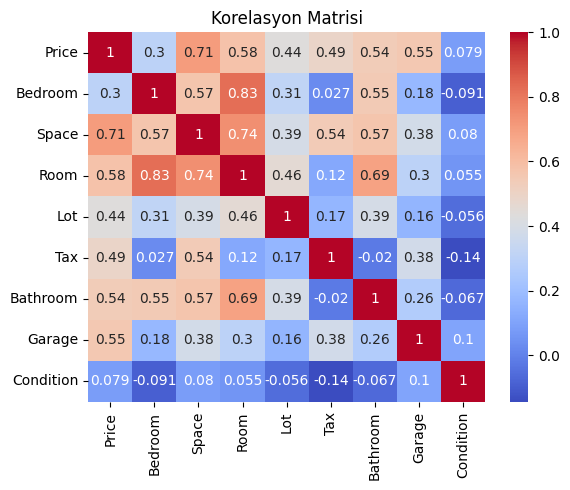

In [26]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()